## Quelques lois de probabilités
<center>Table 1 - Quelques lois de probabilités</center>

| Loi                | Expression                                      | Moyenne | Variance |
|:------------------|:-----------------------------------------------:|:-------|:--------:|
| Poisson            |$$P(\lambda)(k)=\frac{\lambda^k}{k!}e^{-\lambda}$$|$$\lambda$$|$$\lambda$$|
|Binômiale négative |  $$Neg(r,p)(k)=\frac{\Gamma(k + r)}{k!\Gamma(r)}p^r(1-p)^k$$| $$r(1-p)/p$$ | $$ r(1-p)/p^2$$|
|Log-normale |  $$LogN(\mu,\sigma)(x)=\frac{1}{x\sigma\sqrt{2\pi}} \exp \left( -\left[\mbox{ln}(x)-\mu\right]^2/(2\sigma^2)\right)$$ | $$e^{\mu+\sigma^2/2}$$ |  $$(e^{\sigma^2}-1)e^{2\mu+\sigma^2}$$ |
|Gamma |  $$G(\lambda,\kappa)(x)=\frac{\lambda ^\kappa}{\Gamma(\kappa)}x^{\kappa-1}e^{-\lambda x}$$ |   $$k /\lambda$$ | $$  k /\lambda^2$$ |
|Normale |   $$N(\mu,\sigma)(x)=\frac{1}{\sqrt{2 \pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ | $$\mu$$ | $$\sigma^2$$ |
|Exponentielle | $$E(\lambda)(x)=\lambda e^{-\lambda x}$$ |$$1/\lambda$$|$$1/\lambda^2$$|
|Valeurs extrêmes |  $$P(\mu,\sigma,\xi)(x)=\exp\left[-\left(1+\xi\cdot\frac{x-\mu}{\sigma}\right)^{1/\xi}\right]$$ | - | - |

---

# 1. Méthode des moments

L'ajustement le plus simple est de chercher la loi ayant les mêmes moments que les données. Les moments des données sont :  

| Moyenne ($1^{er}$ moment) | $E=\int X dP = \frac 1N \sum x_i$                            |  
|:-|:-|
| **Variance ($2^{e}$ moment)**| $\sigma^2=\int (X-\mu)^{2} dP = \frac 1N \sum (x_i-\mu)^{2}$ |  

Le nombre de paramètres de la loi donne le nombre de moments à égaliser. Trois séries de données (*serie01.txt, serie02.txt et serie03.txt*) ont été obtenues lors d'expériences et on cherche à leur affecter l'une des lois de probabilité suivante : loi log-normale, loi binomiale négative et loi de Poisson.  
#### Exercices

1. Donner les principales caractéristiques de ces trois lois (on pourra s'aider d'internet), à savoir le nombre de paramètres, la moyenne et la variance. Quelles sont leurs particularités respectives ?

**Solution:**

a. Log-normale: deux paramètres ($\mu$, $\sigma$), la moyenne est $$e^{\mu+\sigma^2/2}$$ et la variance est $$(e^{\sigma^2}-1)e^{2\mu+\sigma^2}$$
b. Binomaile negative: deux paramètres ($r$, $p$), la moyenne est $$r(1-p)/p$$ et la variance est $$ r(1-p)/p^2$$
c. Poisson: un paramètre $\lambda$, la moyenne est $$\lambda$$ et la variance est aussi $$\lambda$$

2. Calculer les densités de probabilité (pdf) de ces trois séries et tracer les avec leurs pdf théoriques ajustées à l'aide de la méthode des moments.`[hist/histplot, scipy.stats.nbinom.pmf, scipy.stats.poisson.pmf, scipy.stats.lognorm.pdf]`

**Solution:**

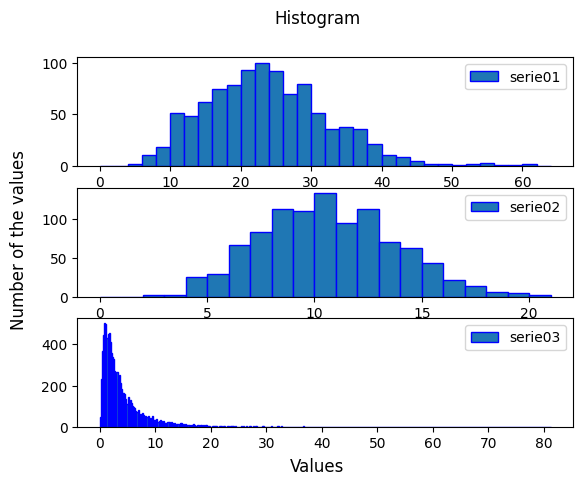

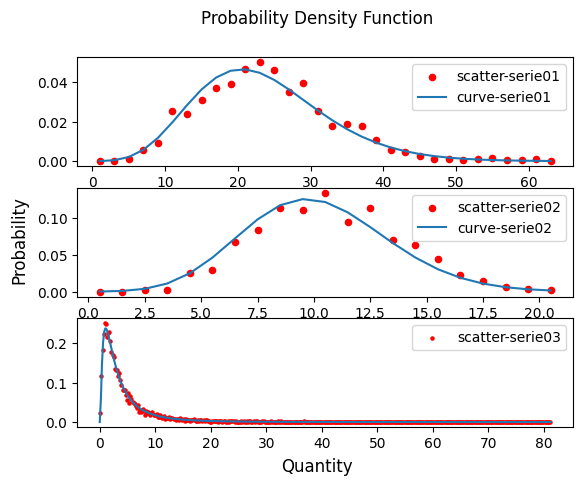

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import nbinom
from scipy.stats import poisson
from scipy.stats import lognorm

# load file and calculate the maximum
data1 = np.loadtxt('data/serie01.txt', dtype='f')
data2 = np.loadtxt('data/serie02.txt', dtype='f')
data3 = np.loadtxt('data/serie03.txt', dtype='f')

## plot the histogram ##
# creat the bins of different histogram
max_1 = max(data1)
max_2 = max(data2)
max_3 = max(data3)

# plot the historgram of data1
interval = [2, 1, 0.2]
bin_1 = np.arange(0, max_1, interval[0])
bin_2 = np.arange(0, max_2, interval[1])
bin_3 = np.arange(0, max_3, interval[2])

# plot the histogram of three data
fig_his, axs_his = plt.subplots(3)
fig_his.suptitle('Histogram')
fig_his.supxlabel("Values")
fig_his.supylabel("Number of the values")
n1 = axs_his[0].hist(data1, bins=bin_1, edgecolor="blue", label="serie01")
n2 = axs_his[1].hist(data2, bins=bin_2, edgecolor="blue", label="serie02")
n3 = axs_his[2].hist(data3, bins=bin_3, edgecolor="blue", label="serie03")
axs_his[0].legend(loc="upper right")
axs_his[1].legend(loc="upper right")
axs_his[2].legend(loc="upper right")


## plot the pdf of three data ##
fig_pdf, axs_pdf = plt.subplots(3)
fig_pdf.suptitle('Probability Density Function')
fig_pdf.supxlabel("Quantity")
fig_pdf.supylabel("Probability")

# the pdf of serie01 (méthode des moments)
h1 = n1[0] / interval[0] / len(data1)
x1 = np.arange(interval[0]/2, max_1-interval[0]/2, interval[0])
axs_pdf[0].scatter(x1, h1,  c = 'r', s=20, label = 'scatter-serie01')     # the scatter
mean_1 = np.mean(data1)
var_1 = np.var(data1)
p_1 = mean_1 / var_1               # the first parameter for nbinom
r_1 = mean_1 * p_1 / (1 - p_1)     # the second parameter for nbinom
axs_pdf[0].plot(x1, nbinom.pmf(x1, r_1, p_1), label = 'curve-serie01')    # the curve
axs_pdf[0].legend()

# the pdf of serie02 (méthode des moments)
h2 = n2[0] / interval[1] / len(data2)
x2 = np.arange(interval[1]/2, max_2-interval[1]/2, interval[1])
axs_pdf[1].scatter(x2, h2,  c = 'r', s=20, label = 'scatter-serie02')     # the scatter
mean_2 = np.mean(data2)            # parameter for poisson
axs_pdf[1].plot(x2, poisson.pmf(x2, mean_2), label = 'curve-serie02')     # the curve
axs_pdf[1].legend()

# the pdf of serie03 (méthode des moments)
h3 = n3[0] / interval[2] / len(data3)
x3 = np.arange(interval[2]/2, max_3-interval[2]/2, interval[2])
axs_pdf[2].scatter(x3, h3,  c = 'r', s=5, label = 'scatter-serie03')      # the scatter
mean_3 = np.mean(data3)            # parameter for lognorm
var_3 = np.var(data3)
sigma_3 = math.sqrt(np.log(var_3/mean_3**2 + 1))
mu_3 = np.log(mean_3) - sigma_3**2/2
plt.plot(bin_3, lognorm.pdf(bin_3, sigma_3, loc=0, scale=np.exp(mu_3)))
axs_pdf[2].legend()
plt.show()

# lognormal_params = lognorm.fit(data3, method="MLE")   # another method of getting fitting parameters
# axs_pdf[2].plot(
#    bin_3,
#    lognorm.pdf(bin_3, lognormal_params[0], lognormal_params[1], lognormal_params[2]),
#    label='curve-serie03')                 # the curve



3. Pour chacune de ces séries, tracer un diagramme quantile experimental/quantile théorique ainsi que la droite $y=x$. `[scipy.stats.nbinom.ppf, scipy.stats.poisson.ppf, scipy.stats.lognorm.ppf]`

**Solution:**

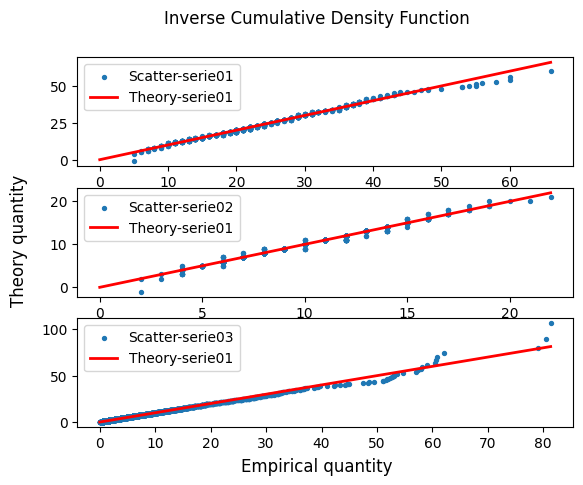

In [3]:
## plot the inverse cumulative distribution function ##
# calculate the ppt of serie01
fig_ppf, axs_ppf = plt.subplots(3)
fig_ppf.suptitle("Inverse Cumulative Density Function")
fig_ppf.supxlabel("Empirical quantity")
fig_ppf.supylabel("Theory quantity")
x_ppf1 = np.sort(data1)
y_ppf1 = np.arange(len(x_ppf1))/float(len(x_ppf1))
ppf_1 = nbinom.ppf(y_ppf1, r_1, p_1)

axs_ppf[0].scatter(x_ppf1, ppf_1, s=8, label="Scatter-serie01")    # the curve
axs_ppf[0].plot([0, max(x_ppf1)], [0, max(x_ppf1)], "r-", linewidth=2.0, label="Theory-serie01")
axs_ppf[0].legend()

# calculate the ppt of serie02
x_ppf2 = np.sort(data2)
y_ppf2 = np.arange(len(x_ppf2))/float(len(x_ppf2))
ppf_2 = poisson.ppf(y_ppf2, mean_2)

axs_ppf[1].scatter(x_ppf2, ppf_2, s=8, label="Scatter-serie02")    # the curve
axs_ppf[1].plot([0, max(x_ppf2)], [0, max(x_ppf2)], "r-", linewidth=2.0, label="Theory-serie01")
axs_ppf[1].legend()

# calculate the ppt of serie03
x_ppf3 = np.sort(data3)
y_ppf3 = np.arange(len(x_ppf3))/float(len(x_ppf3))
ppf_3 = lognorm.ppf(y_ppf3, sigma_3, loc=0, scale=np.exp(mu_3))

axs_ppf[2].scatter(x_ppf3, ppf_3, s=8, label="Scatter-serie03")    # the curve
axs_ppf[2].plot([0, max(x_ppf3)], [0, max(x_ppf3)], 'r-', linewidth=2.0, label="Theory-serie01")
axs_ppf[2].legend()
plt.show()

4. Que dire de ce diagramme pour la série 3 ?

**Solution:**

La série 3 contient des données extrêmement larges et relativement concentrées à de petites valeurs.

# 2. Méthode du maximum de vraisemblance
 
Nous allons dans cette section appliquer la méthode du maximum de vraisemblance aux données *seriegamma.txt*. Nous voulons ici caler une loi Gamma à deux paramètres.
#### Exercices
1. Pour commencer nous allons créer une fonction Python qui calcule l'opposée de la log-vraisemblance $l(\kappa,\lambda)$ lorsqu'on lui donne les paramètres $(\kappa,\lambda)$ et les données $x_i$. La vraisemblance est définie de la manière suivante:
$$
L(\kappa,\lambda) = \prod_{i=1}^N G_a[\lambda,\kappa](x_i).
$$
  
- Calculer **analytiquement** la fonction $l(\kappa,\lambda,x_i)=-$ln$(L)$ et simplifier au maximum son expression.

**Solution:**

$$
\begin{aligned}
l(\kappa,\lambda,x_i)&=-ln(L)=-ln(\prod_{i=1}^N G_a[\lambda,\kappa](x_i))\\
&=-\sum_{i=1}^{N} ln(\frac{\lambda ^\kappa}{\Gamma(\kappa)}x_{i}^{\kappa-1}e^{-\lambda x_{i}})\\
&=-\sum_{i=1}^{N} [ln(\frac{\lambda ^\kappa}{\Gamma(\kappa)})+(\kappa-1)ln(x_{i})-\lambda x_{i}]\\
&=\sum_{i=1}^{N} \lambda x_{i} -\sum_{i=1}^{N} (\kappa-1)ln(x_{i}) -N ln(\frac{\lambda ^\kappa}{\Gamma(\kappa)})\\
\end{aligned}
$$


- Pour créer une fonction dans Python, il faut créer un fonction **mafonction**. (cf premier TD) La syntaxe est ensuite du type : `def` `scipy.special.gamma`

    ```python
    def mafonction(kappa, Lambda, x):
        lvrai = ...;
        return Lvrai
    ```
    
Une fois que cette fonction est créée, la commande fonction `mafonction`$(k,l,x)$ vous donne l'opposé de la valeur de la log-vraisemblance correspondant au triplet $(k,l,x)$.

- Insérer l'expression analytique trouvée dans `mafonction`. 

**Solution:**

In [4]:
from scipy.special import gamma

# define the function (lambda is a specfic function in python, so we use Lambda here to avoid conflicts)
def mafonction(kappa, Lambda, x):
  Lvari = Lambda*np.sum(x) - (kappa-1)*np.sum(np.log(x)) - len(x)*np.log(Lambda**kappa/gamma(kappa))
  return Lvari

2. Nous allons ensuite chercher le minimum de la fonction créée avec la fonction: `mafonction`$(k,l,x)$

Ici, on cherche la valeur qui minimise `mafonction`. Comme notre fonction a deux paramètres, nous allons effectuer une recherche par itérations. L'algorithme est le suivant :


- Fixer un paramètre $k$ arbitrairement
- Pour i=1...100:
    - Utiliser `lambda` pour créer une nouvelle fonction qui ne contient que la variable $l$:
    
        ```python
        lambda l: mafonction(k, l, data)
        ```
    
    Calculer la borne inférieure de $l$ avec la fonction `scipy.optimize.fminbound` dans l'interval [0, 10].
    - Utiliser `lambda` pour créer une nouvelle fonction qui ne contient que la variable $k$:
    
        ```python
        lambda k: mafonction(k, l, data)
        ```
    
    Calculer la borne inférieure de $k$ avec la fonction `scipy.optimize.fminbound` dans l'interval [0, 10].
 
- Fin de la boucle.

Coder cet algorithme.

**Solution:**

In [5]:
import scipy as sc

# load the data
data = np.loadtxt("data/seriegamma.txt", dtype="f")

# calculate the first method (max likelihood)
ka_loop = 1;
for x in range(1, 101, 1):
    func_La = lambda La_loop: mafonction(ka_loop, La_loop, data)     # create the optimization function for lambda
    La_loop = sc.optimize.fminbound(func_La, 0, 10)
    func_ka = lambda ka_loop: mafonction(ka_loop, La_loop, data)     # create the optimization function for Kappa
    ka_loop = sc.optimize.fminbound(func_ka, 0, 10)
    
# print(ka_loop, La_loop)

3. L'algorithme converge t'il ? Tracer la densité de probabilité de la loi ajustée, et la comparer à celle obtenue grâce à la méthode des moments et la méthode des empiriques. `scipy.stats.gamma.pdf`

**Solution:**

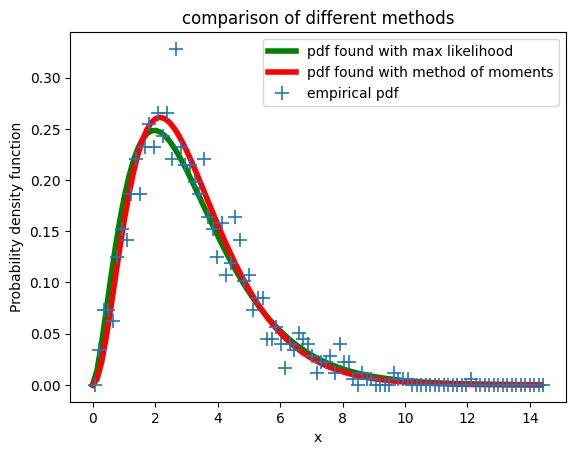

In [6]:
# the first method (method of max likelihood)
x = np.arange(0, np.max(data), np.max(data)/100)
Gam1 = sc.stats.gamma.pdf(x, ka_loop, loc=0, scale=1/La_loop)

# the second method (method of moments)
M1 = np.mean(data);
V1 = np.mean(data);
la1 = V1 / M1
k1 = M1 / la1
Gam2 = sc.stats.gamma.pdf(x, k1, loc=0, scale=la1)    # be careful with the scale

# the third method (empirical method)
N = np.zeros(100)
for i in range(1, len(data), 1):
    for j in range(1, len(x)-1, 1):
        if data[i] < x[j+1] and data[i] >= x[j]:
            N[j] = N[j] + 1

dx = np.max(data) / 100
dp = N / len(data)
pdf = dp / dx     # calculate the probability of 'each bin'

# plot the difference between these methods
plt.plot(x, Gam1, "g", linewidth=4, label="pdf found with max likelihood")
plt.plot(x, Gam2, "r", linewidth=4, label="pdf found with method of moments")
plt.plot(np.arange(dx/2, x[-1]+dx, dx), pdf, '+', markersize=10, markeredgewidth=1.2, \
         label="empirical pdf")
plt.title("comparison of different methods")
plt.xlabel("x")
plt.ylabel("Probability density function")
plt.legend()
plt.show()

# 3. Ajustement de lois de valeurs extrêmes sur des données

Nous allons maintenant faire un ajustement de loi de valeurs extrêmes sur les données de températures et de précipitations à Davos. Il s'agit de déterminer le type de loi de valeurs extrêmes (Weibull, Gumbel ou Fréchet) qui décrit le mieux le comportement des maxima de chaque série. Dans cette exercice, nous utiliserons directement la fonction `scipy.stats.genextreme.gev.fit` qui estime les paramètres de la loi généralisée des valeurs extrêmes par la méthode du maximum de vraisemblance vue dans l'exercice précédent.
Nous procédons de la manière suivante :  
- Définir des blocs (classiquement des années)
- Calculer le maximum de chaque bloc (donc par exemple le maximum annuel)
- Utiliser ces maxima pour caler la loi des valeurs extrêmes
- Tracer cette loi et comparer avec la courbe empirique.
#### Exercices

1. **Précipitations**  
De quel type (Gumbel, Fréchet ou Weibull) est la distribution de la dernière colonne? `numpy.where` `scipy.stats.genextreme.gev.fit`

**Solution:**

In [7]:
from scipy.stats import genextreme as gev

data = np.loadtxt('data/temperature_davos.txt', dtype='f')

# calculate the maximum temperature each year
pmax = np.zeros(105)
for i in range(1901, 2006, 1):
    pmax[i-1901] = np.max(data[np.where(data[:,1] == i), 7])

# get the generalized extreme value parameter estimates
p = gev.fit(pmax)   # shape parameter, location, and scale
print(p[0])
# if p[0] > 0, Weibull
# if p[0] = 0, Gumbel
# if p[0] < 0, Frechet

0.28259205010266153


Les données correspondent à la distribution de Weibull.

2. **Températures**  
Le fichier possède plusieurs colonnes de données, les trois dernières colonnes représentent la température à 7h, 13h et 21h. Choisissez-en une et trouver la loi de valeurs extrêmes qui convient le mieux pour décrire la distribution des maxima:
- Tracer les densités de probabilité (pdf) et les fonctions de distribution cumulative (cdf) `scipy.stats.genextreme.gev.pdf` `scipy.stats.genextreme.gev.cdf`

**Solution:**

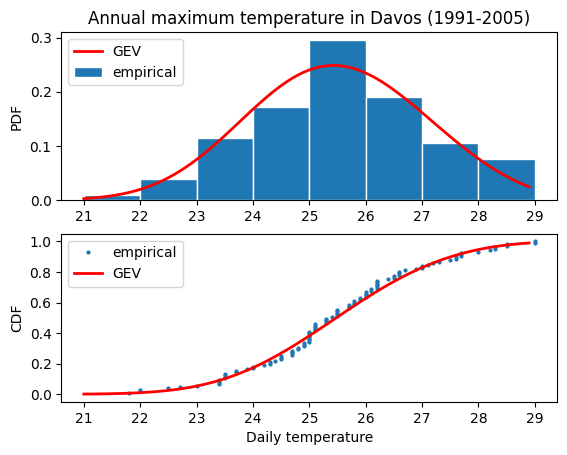

In [8]:
# calculate the empirical probability density function (choose 21h, the data is subject to Weibull distribution)
p_min = math.floor(min(pmax))
p_max = math.ceil(max(pmax))
nbins = p_max - p_min     # number of bins with the interval 1
m_int = np.arange(p_min, p_max+1, 1)
pmax_hist = np.histogram(pmax, bins=m_int)
pmax_pdf = pmax_hist[0] / len(pmax)   # the empirical pdf

# calculate the empirical cumulative density function  (useful function: scikits.statsmodels.tools.ECDF)
pmax_x = np.sort(pmax)
pmax_ecdf = np.arange(1, pmax_x.size+1) / pmax_x.size

interval = np.arange(p_min, p_max, 0.1)
# probability density function (pdf) of the generalized extremum distribution
d_gevpdf = gev.pdf(interval, p[0], loc=p[1], scale=p[2])

# distribution function (cdf) of the generalized extremum distribution (GEV)
f_gevcdf = gev.cdf(interval, p[0], loc=p[1], scale=p[2])

## plot the figures
# the histogram and pdf
fig_his, axs_his = plt.subplots(2)
m_bar = np.arange(p_min+0.5, p_max+0.5, 1)
axs_his[0].bar(m_bar, pmax_pdf, width=1, edgecolor="white", label="empirical")
axs_his[0].plot(interval, d_gevpdf, "r-", linewidth=2.0, label="GEV")
axs_his[0].set_title("Annual maximum temperature in Davos (1991-2005)")
axs_his[0].set_ylabel("PDF")
axs_his[0].legend(loc="upper left")

# the empirical cdf and GEV cdf
axs_his[1].plot(pmax_x, pmax_ecdf, "o", markersize=2, label="empirical")
axs_his[1].plot(interval, f_gevcdf, "r-", linewidth=2.0, label="GEV")
axs_his[1].legend(loc="upper left")
axs_his[1].set_xlabel("Daily temperature")
axs_his[1].set_ylabel("CDF")
plt.show()

- Calculer le temps de retour de différentes températures

**Solution:**

/tmp/ipykernel_193/2039369205.py:1: RuntimeWarning: divide by zero encountered in true_divide
  Tr = 1 / (1-pmax_ecdf);    # return time (ecdf)


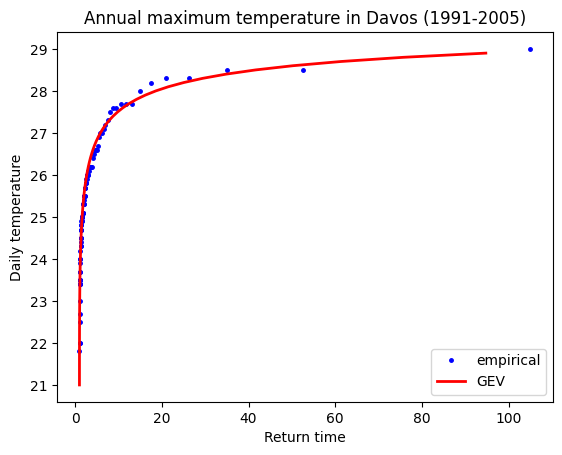

In [9]:
Tr = 1 / (1-pmax_ecdf);    # return time (ecdf)
Tr_gevcdf = 1 / (1-f_gevcdf);    # return time (cdf)
plt.plot(Tr, pmax_x, ".b", markersize=5, label="empirical")
plt.plot(Tr_gevcdf, interval, "r", linewidth=2.0, label="GEV")
plt.title("Annual maximum temperature in Davos (1991-2005)")
plt.xlabel("Return time")
plt.ylabel("Daily temperature")
plt.legend(loc="lower right")
plt.show()

3. **Trouver la meilleure distribution**  
La distribution de Weibull est-elle la meilleure solution? Nous n'en sommes pas sûrs. Dans cette question, nous allons essayer de trouver la distribution la mieux adaptée aux données.
Ici, nous utilisons le package fitter pour le faire (voir plus d'informations sur [ce site](https://fitter.readthedocs.io/en/latest/index.html)). Il faut l'installer (`!pip install fitter`) et l'importer `Fitter` à partir de celui-ci.

Utiliser `Fitter` pour ajuster l'ensemble de données. Vous pouvez utiliser la distribution de votre choix.

**Solution:**

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]


{'dgamma': {'a': 1.3649395726552984,
  'loc': 25.42890826426683,
  'scale': 0.8919371195135322}}

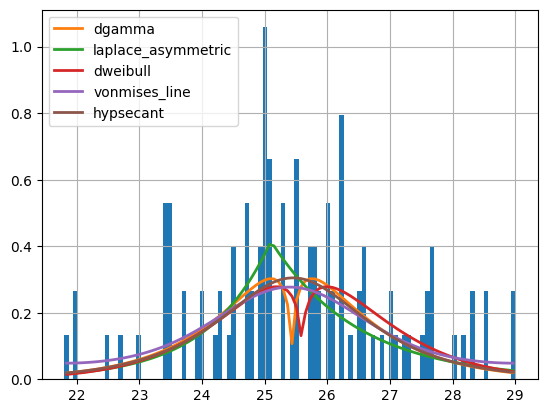

In [10]:
# ipip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

# get_common_distributions()    # to get common distribution names in fitter
# get_distributions()   # to get all 109 distribution names in fitter

# f = Fitter(pmax)    # in the case if you are not sure about which distribution you want to fit
f = Fitter(pmax,
          distributions=['dgamma',
                         'laplace_asymmetric',
                         "dweibull",
                         "vonmises_line",
                         "hypsecant"])    # nominate the distribution name
f.fit()
f.summary()        # summary the result and plot it
f.get_best(method = 'sumsquare_error')    # you can change the method